# Logistic Regression From Scratch

## Objective

Implement Logistic Regression using **only NumPy**. No sklearn for training!

We'll build:
1. Sigmoid function
2. Cost function (log loss)
3. Gradient computation
4. Gradient Descent optimizer
5. Prediction and evaluation
6. Comparison with sklearn

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)


---
## Part 1: Generate Binary Classification Data

We'll create a 2D dataset for binary classification.

Dataset: 200 examples, 2 features
Class 0: 100 examples
Class 1: 100 examples


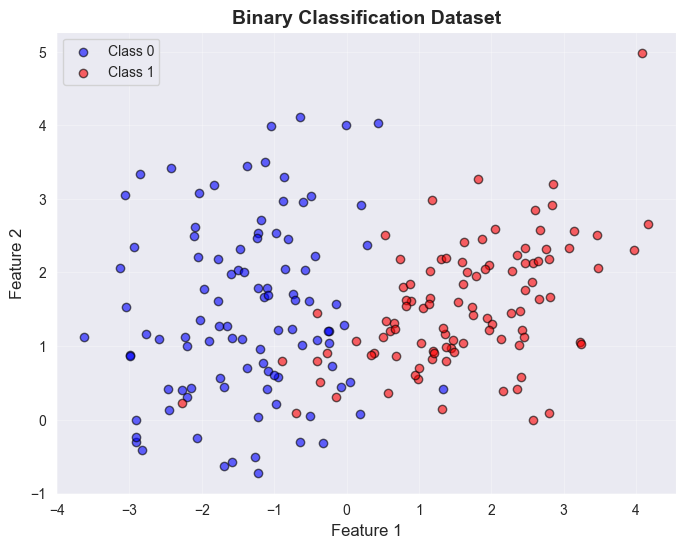

In [2]:
# Generate 2-class classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1,
                          random_state=42, class_sep=1.5)
y = y.reshape(-1, 1)  # Shape (m, 1)

print(f'Dataset: {X.shape[0]} examples, {X.shape[1]} features')
print(f'Class 0: {np.sum(y == 0)} examples')
print(f'Class 1: {np.sum(y == 1)} examples')

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], 
           c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], 
           c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Binary Classification Dataset', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
## Part 2: Implement Sigmoid Function

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

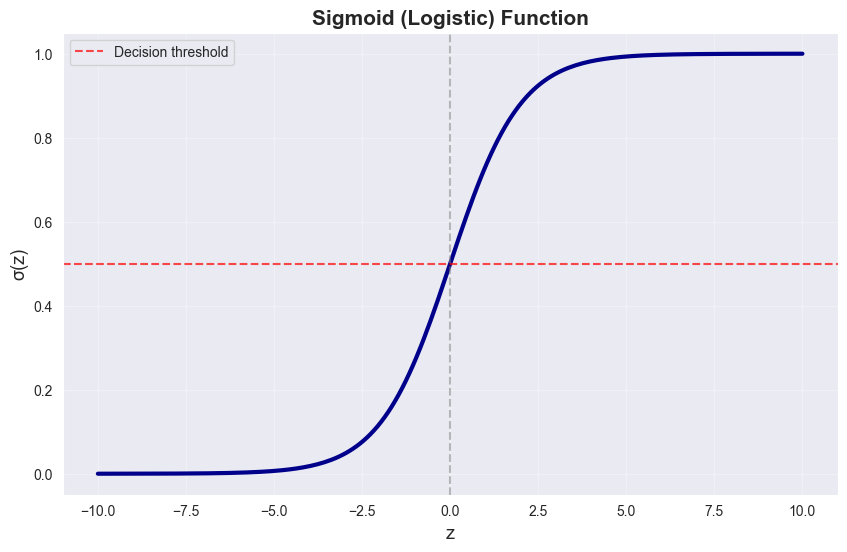

σ(-5) = 0.0067
σ(0) = 0.5000
σ(5) = 0.9933


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualize sigmoid
z_range = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_range)

plt.figure(figsize=(10, 6))
plt.plot(z_range, sig_values, linewidth=3, color='darkblue')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision threshold')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z', fontsize=13)
plt.ylabel('σ(z)', fontsize=13)
plt.title('Sigmoid (Logistic) Function', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'σ(-5) = {sigmoid(-5):.4f}')
print(f'σ(0) = {sigmoid(0):.4f}')
print(f'σ(5) = {sigmoid(5):.4f}')


---
## Part 3: Implement Cost Function (Log Loss)

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right]$$

In [4]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    
    # Clip to avoid log(0)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


---
## Part 4: Implement Gradient Computation

$$\nabla J(\theta) = \frac{1}{m} X^T (\sigma(X\theta) - y)$$

In [5]:
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradients = (1/m) * X.T.dot(h - y)
    return gradients


---
## Part 5: Implement Gradient Descent

In [6]:
def gradient_descent(X, y, theta, learning_rate, n_iterations, verbose=True):
    cost_history = []
    
    for iteration in range(n_iterations):
        # Compute gradient
        gradients = compute_gradient(X, y, theta)
        
        # Update parameters
        theta = theta - learning_rate * gradients
        
        # Compute cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Print progress
        if verbose and iteration % 1000 == 0:
            print(f'Iteration {iteration:5d} | Cost: {cost:.6f}')
    
    if verbose:
        print(f'Final    | Cost: {cost:.6f}')
    
    return theta, cost_history


---
## Part 6: Train the Model

In [7]:
# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
n_features = X_b.shape[1]
theta_initial = np.zeros((n_features, 1))

# Train
print('='*60)
print('GRADIENT DESCENT TRAINING')
print('='*60)
learning_rate = 0.1
n_iterations = 10000

theta_final, cost_history = gradient_descent(
    X_b, y, theta_initial, learning_rate, n_iterations, verbose=True
)

print('\nLearned parameters:'  )
print(f'θ = {theta_final.ravel()}')


GRADIENT DESCENT TRAINING
Iteration     0 | Cost: 0.639382
Iteration  1000 | Cost: 0.180712
Iteration  2000 | Cost: 0.180090
Iteration  3000 | Cost: 0.180049
Iteration  4000 | Cost: 0.180046
Iteration  5000 | Cost: 0.180045
Iteration  6000 | Cost: 0.180045
Iteration  7000 | Cost: 0.180045
Iteration  8000 | Cost: 0.180045


Iteration  9000 | Cost: 0.180045


Final    | Cost: 0.180045

Learned parameters:
θ = [ 0.81853438  2.80315113 -0.71674237]


---
## Part 7: Visualize Training Process

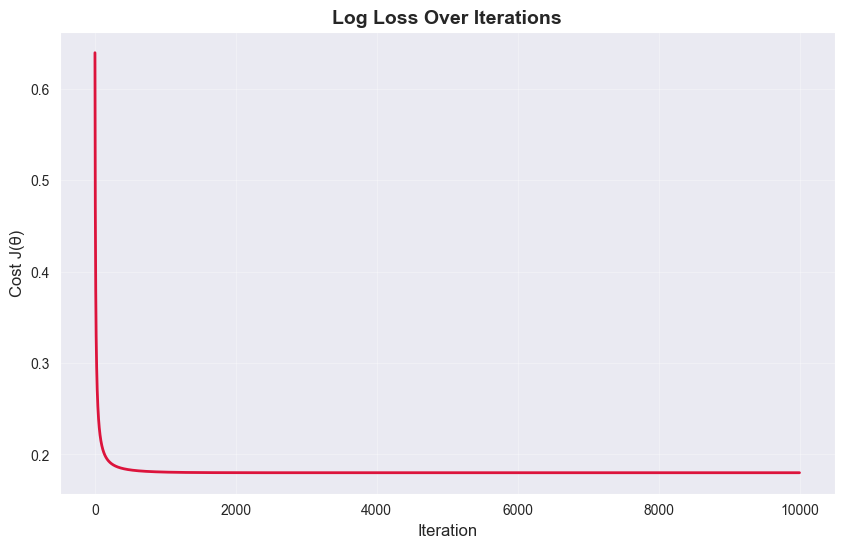

Initial cost: 0.639382
Final cost: 0.180045
Cost reduction: 71.84%


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history, linewidth=2, color='crimson')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('Log Loss Over Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f'Initial cost: {cost_history[0]:.6f}')
print(f'Final cost: {cost_history[-1]:.6f}')
print(f'Cost reduction: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%')


---
## Part 8: Make Predictions

In [9]:
def predict_proba(X, theta):
    return sigmoid(X.dot(theta))

def predict(X, theta, threshold=0.5):
    probabilities = predict_proba(X, theta)
    return (probabilities >= threshold).astype(int)

# Get predictions
y_pred = predict(X_b, theta_final)
y_proba = predict_proba(X_b, theta_final)

# Calculate accuracy
accuracy = np.mean(y == y_pred)
print(f'Training Accuracy: {accuracy * 100:.2f}%')


Training Accuracy: 94.00%


---
## Part 9: Confusion Matrix and Metrics

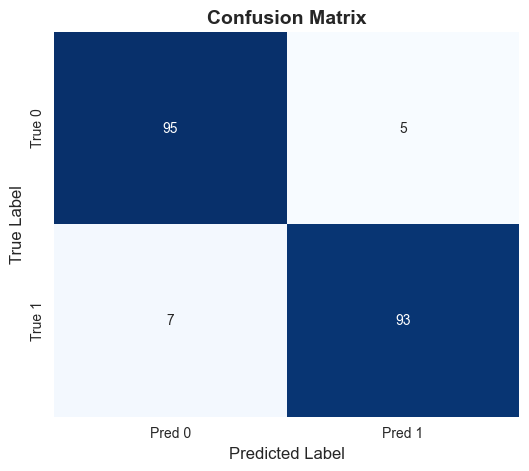


Classification Metrics:
Accuracy:  0.9400
Precision: 0.9490
Recall:    0.9300
F1 Score:  0.9394


In [10]:
# Compute confusion matrix
TP = np.sum((y == 1) & (y_pred == 1))
TN = np.sum((y == 0) & (y_pred == 0))
FP = np.sum((y == 0) & (y_pred == 1))
FN = np.sum((y == 1) & (y_pred == 0))

cm = np.array([[TN, FP], [FN, TP]])

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Pred 0', 'Pred 1'],
           yticklabels=['True 0', 'True 1'],
           cbar=False)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Calculate metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print('\nClassification Metrics:')
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')


---
## Part 10: Visualize Decision Boundary

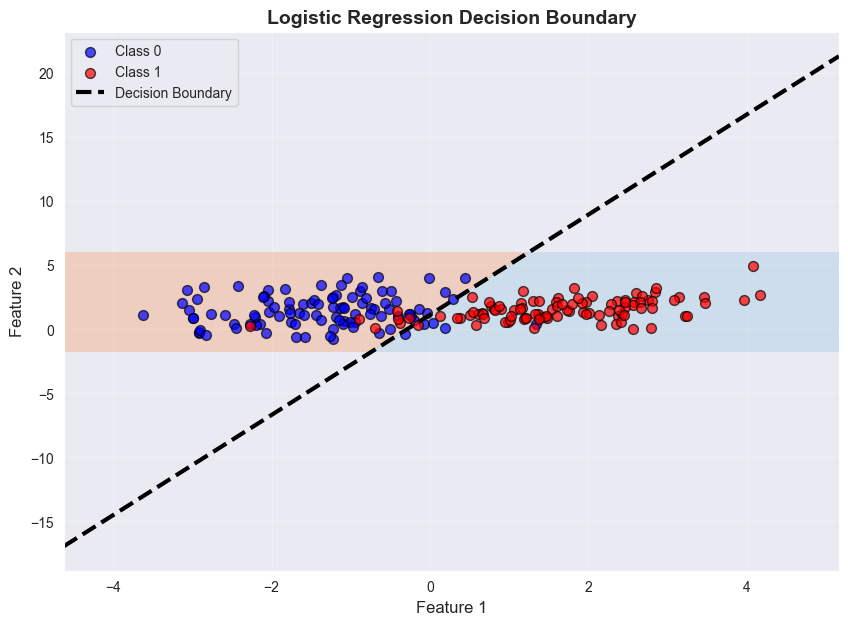

In [11]:
# Create mesh grid
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                      np.linspace(x2_min, x2_max, 200))

# Predict for each point in mesh
mesh_points = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
Z = predict(mesh_points, theta_final)
Z = Z.reshape(xx1.shape)

# Plot
plt.figure(figsize=(10, 7))
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdYlBu', levels=[0, 0.5, 1])
plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1],
           c='blue', label='Class 0', alpha=0.7, edgecolors='k', s=50)
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1],
           c='red', label='Class 1', alpha=0.7, edgecolors='k', s=50)

# Plot decision boundary (where probability = 0.5)
# θ0 + θ1*x1 + θ2*x2 = 0
# x2 = -(θ0 + θ1*x1) / θ2
x1_boundary = np.array([x1_min, x1_max])
x2_boundary = -(theta_final[0] + theta_final[1] * x1_boundary) / theta_final[2]
plt.plot(x1_boundary, x2_boundary, 'k--', linewidth=3, label='Decision Boundary')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Logistic Regression Decision Boundary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
## Part 11: Compare with Scikit-Learn

In [12]:
# Train sklearn model
sklearn_model = LogisticRegression(max_iter=10000)
sklearn_model.fit(X, y.ravel())

# Get parameters
sklearn_theta0 = sklearn_model.intercept_[0]
sklearn_theta = np.concatenate([[sklearn_theta0], sklearn_model.coef_[0]])

print('='*60)
print('COMPARISON: OUR vs SKLEARN')
print('='*60)
print(f'Our θ:       {theta_final.ravel()}')
print(f'sklearn θ:   {sklearn_theta}')
print(f'Difference:  {np.abs(theta_final.ravel() - sklearn_theta)}')
print('='*60)

# Compare predictions
y_pred_sklearn = sklearn_model.predict(X).reshape(-1, 1)
accuracy_sklearn = np.mean(y == y_pred_sklearn)

print(f'\nOur Accuracy:     {accuracy:.4f}')
print(f'sklearn Accuracy: {accuracy_sklearn:.4f}')


COMPARISON: OUR vs SKLEARN
Our θ:       [ 0.81853438  2.80315113 -0.71674237]
sklearn θ:   [ 0.62438634  2.40955857 -0.56440271]
Difference:  [0.19414804 0.39359256 0.15233966]

Our Accuracy:     0.9400
sklearn Accuracy: 0.9400


---
## Summary: What We Built

### Implemented:
1. Sigmoid function
2. Log loss cost function
3. Gradient computation
4. Gradient Descent optimizer
5. Prediction functions
6. Evaluation metrics
7. Decision boundary visualization
8. Comparison with sklearn

### Key Insights:
1. **Sigmoid**: Maps any value to (0, 1) for probability interpretation
2. **Log Loss**: Penalizes wrong predictions more heavily than MSE
3. **Gradient**: Same form as linear regression but with sigmoid
4. **Decision Boundary**: Where θᵀx = 0 (h(x) = 0.5)
5. **Our implementation**: Matches sklearn!

### Interview Readiness:
You can now explain:
- Why we use sigmoid instead of linear function
- How to derive log loss from maximum likelihood
- Why gradient has the same form as linear regression
- How decision boundaries work
- Trade-offs between different threshold values

---

**Next**: See `decision_boundary_visualization.ipynb` for non-linear boundaries!